In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt



In [3]:
df = pd.read_csv('Novice.csv')

In [3]:
df.head()

,Match ID 18Char,Stage,Little ID,Big ID,Big County,Big Age,Big Occupation,Big: Military,Big Approved Date,Big Level of Education,...,Little Contact: Interest Finder - Career,Little Contact: Interest Finder - Personality,Little Contact: Interest Finder - Three Wishes,Little Gender,Little Participant: Race/Ethnicity,Little Birthdate,Little Mailing Address Census Block Group,Big Home Census Block Group,Big Employer/School Census Block Group,Match Length
0,a1v2J0000028pRvQAI,Closed,0032J00003PLe29QAD,0032J00003PhDOI,Hennepin,40,Unemployed,NaN,NaN,Masters Degree,...,NaN,NaN,NaN,Female,Black or African American,2004-01-01 00:00:00,2.705303e+11,2.705302e+11,NaN,9.0
1,a1v2J000002uR0JQAU,Closed,0032J00003PfZ6OQAV,0032J00003PgoV1,Washington,65,Tech: Research/Design,NaN,2018-04-11 00:00:00,NaN,...,NaN,NaN,NaN,Female,Black or African American; White or Caucasian,2006-06-01 00:00:00,2.716307e+11,2.716307e+11,NaN,46.1
2,a1v2J0000027NsOQAU,Closed,0032J00003PLeoRQAT,0032J00003Ph0MT,Ramsey,45,Military,NaN,NaN,Bachelors Degree,...,NaN,NaN,NaN,Male,Black or African American; White or Caucasian,2007-01-01 00:00:00,2.700305e+11,2.712304e+11,NaN,6.2
3,a1v2J0000027dtOQAQ,Active,0032J00003PLeoRQAT,0032J00003Ph14N,Hennepin,61,Finance: Banking,NaN,2018-01-02 00:00:00,NaN,...,NaN,NaN,NaN,Male,Black or African American; White or Caucasian,2007-01-01 00:00:00,2.700305e+11,NaN,NaN,85.6
4,a1v2J0000028enKQAQ,Closed,0032J00003PfZ6QQAV,0032J00003Ph14j,Ramsey,29,Human Services: Non-Profit,NaN,2018-03-12 00:00:00,Bachelors Degree,...,NaN,NaN,NaN,Female,Hispanic,2005-01-01 00:00:00,2.716307e+11,2.705311e+11,NaN,28.3


In [ ]:
sns.set(style="whitegrid")

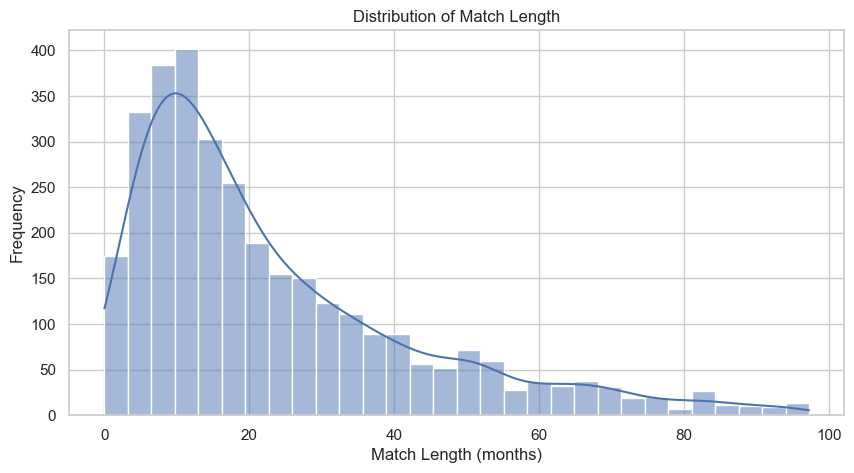

In [ ]:


plt.figure(figsize=(10,5))
sns.histplot(df["Match Length"].dropna(), bins=30, kde=True)
plt.title("Distribution of Match Length")
plt.xlabel("Match Length (months)")
plt.ylabel("Frequency")
plt.show()

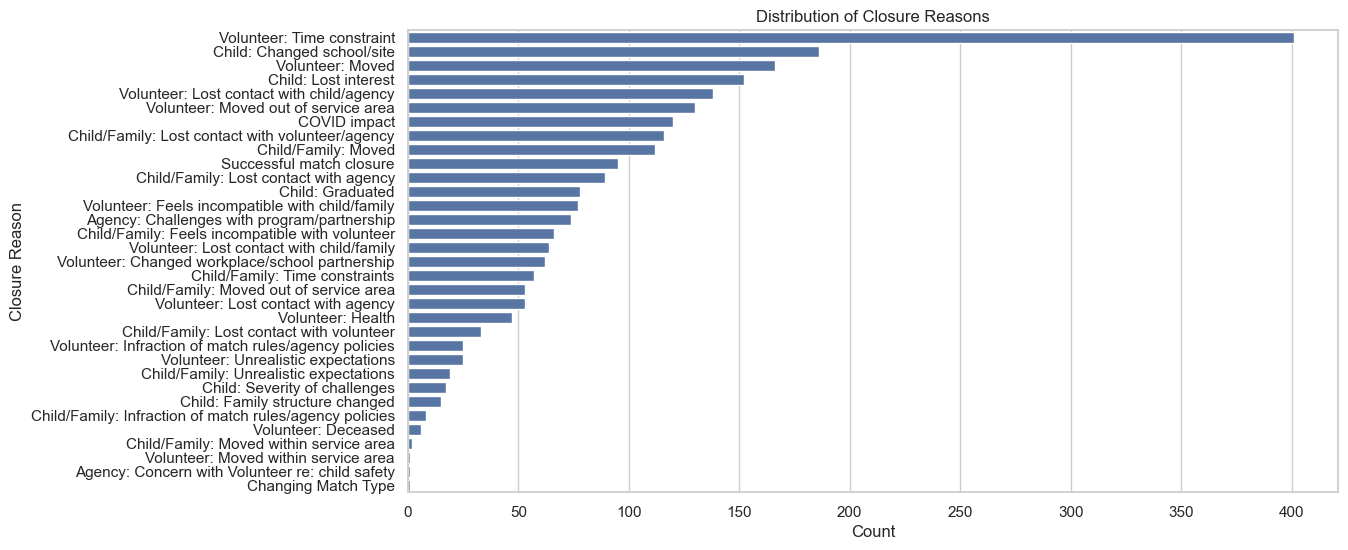

In [6]:
plt.figure(figsize=(12,6))
sns.countplot(y=df["Closure Reason"], order=df["Closure Reason"].value_counts().index)
plt.title("Distribution of Closure Reasons")
plt.xlabel("Count")
plt.ylabel("Closure Reason")
plt.show()

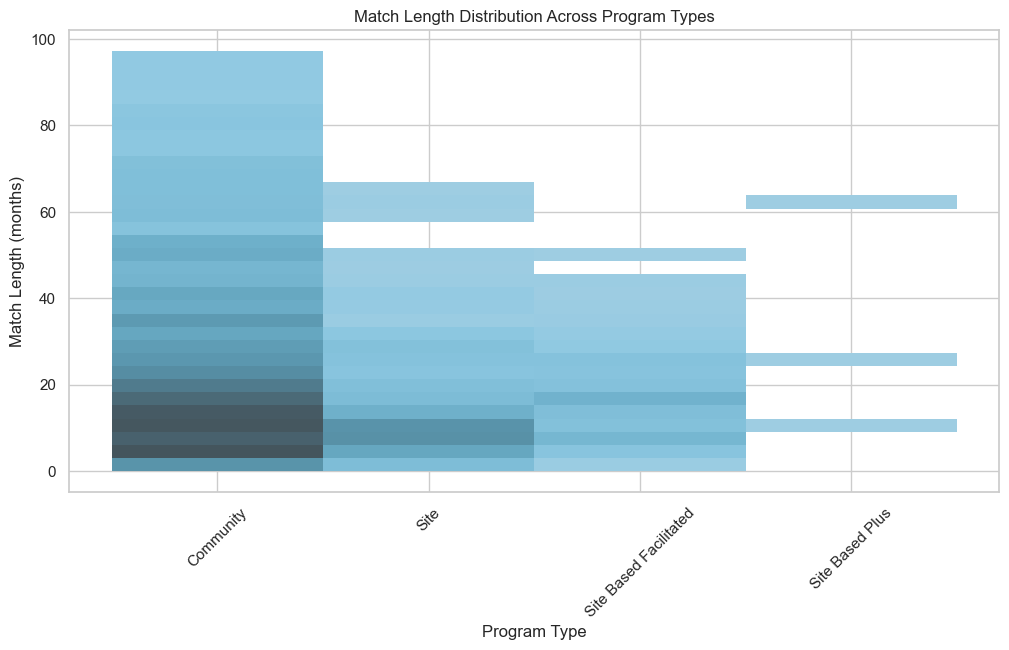

In [23]:
# Plot Match Length distribution across Program Types
plt.figure(figsize=(12,6))
sns.histplot(x="Program Type", y="Match Length", data=df, color="skyblue")
plt.xticks(rotation=45)
plt.title("Match Length Distribution Across Program Types")
plt.xlabel("Program Type")
plt.ylabel("Match Length (months)")
plt.show()



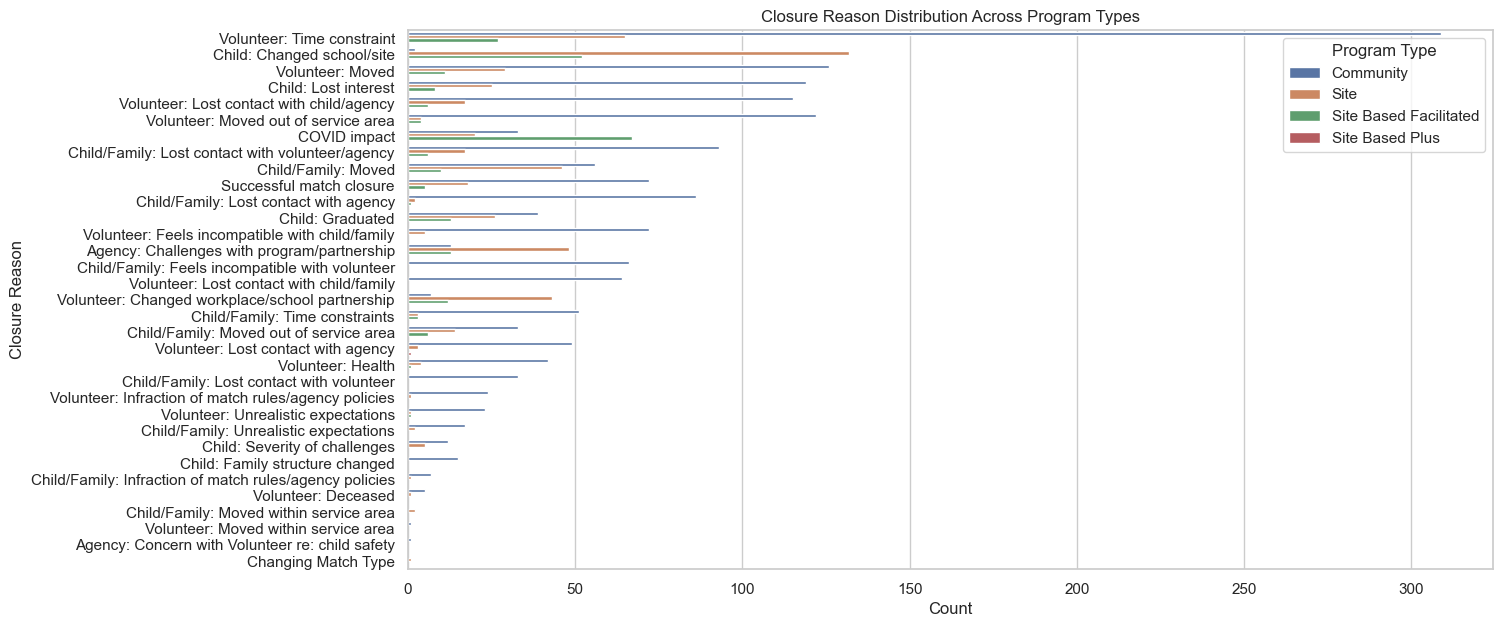

In [ ]:
# Plot Closure Reason distribution across Program Types
plt.figure(figsize=(14,7))
sns.countplot(y=df["Closure Reason"], hue=df["Program Type"], order=df["Closure Reason"].value_counts().index)
plt.title("Closure Reason Distribution Across Program Types")
plt.xlabel("Count")
plt.ylabel("Closure Reason")
plt.legend(title="Program Type", bbox_to_anchor=(1, 1))
plt.show()

In [9]:
# Convert date columns to datetime format
df["Match Activation Date"] = pd.to_datetime(df["Match Activation Date"], errors='coerce')
df["Match Closure Meeting Date"] = pd.to_datetime(df["Match Closure Meeting Date"], errors='coerce')

# Extract year from activation date for trend analysis
df["Activation Year"] = df["Match Activation Date"].dt.year

C:\Users\kojo1\AppData\Local\Temp\ipykernel_19240\4281312039.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Activation Year", y="Match Length", data=df, estimator="mean", ci=None, marker="o")


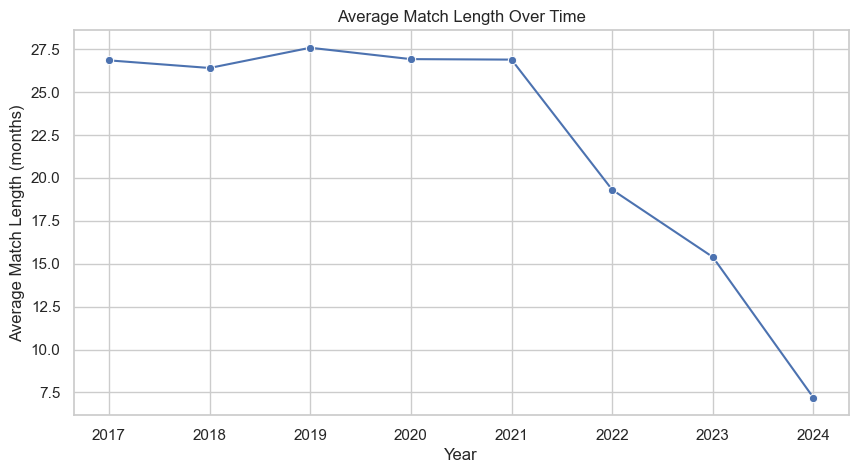

In [10]:
# Plot average Match Length over time
plt.figure(figsize=(10,5))
sns.lineplot(x="Activation Year", y="Match Length", data=df, estimator="mean", ci=None, marker="o")
plt.title("Average Match Length Over Time")
plt.xlabel("Year")
plt.ylabel("Average Match Length (months)")
plt.show()

<Figure size 1200x600 with 0 Axes>

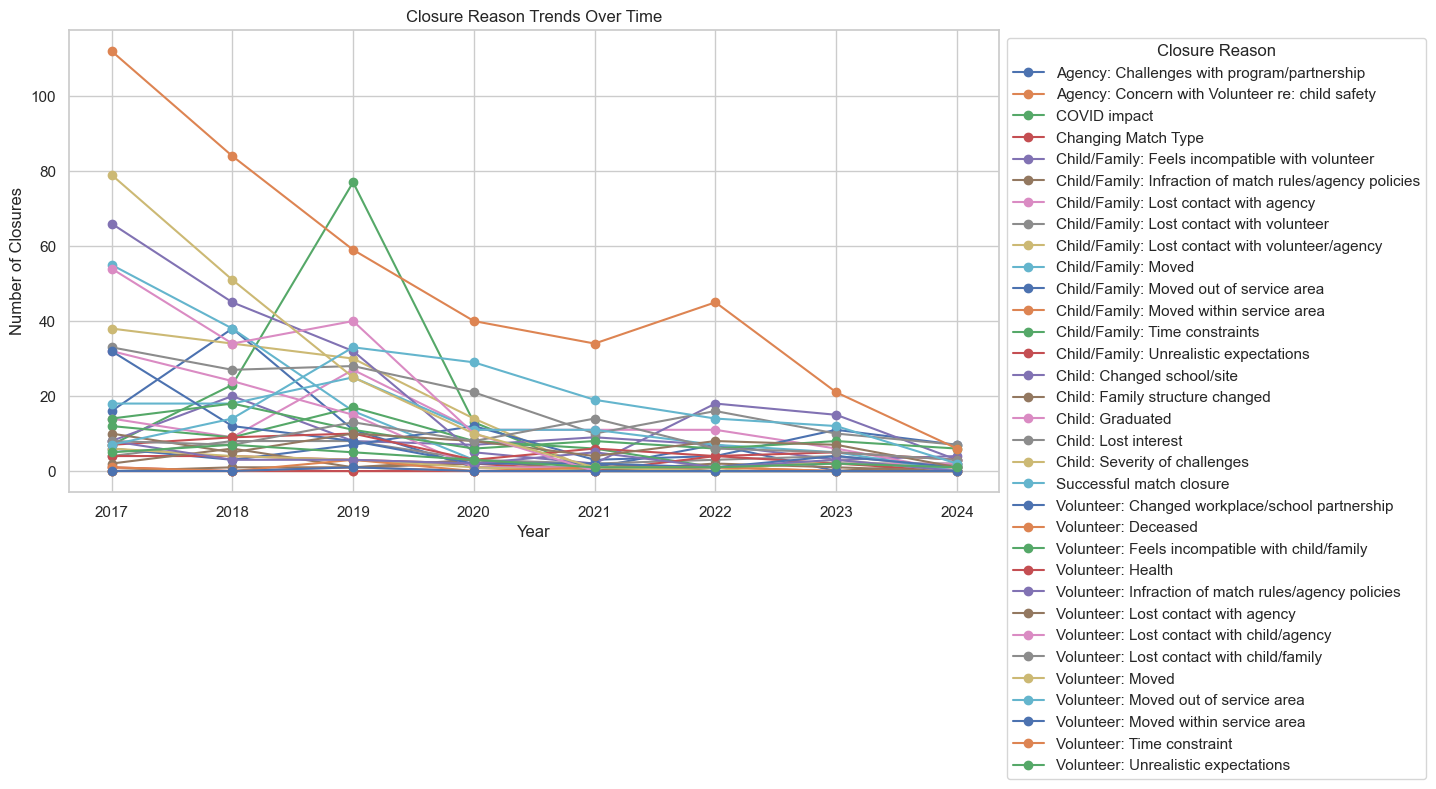

In [11]:
# Plot closure reasons over time
plt.figure(figsize=(12,6))
closure_trend = df.groupby(["Activation Year", "Closure Reason"]).size().unstack().fillna(0)
closure_trend.plot(kind="line", figsize=(12,6), marker="o")
plt.title("Closure Reason Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Closures")
plt.legend(title="Closure Reason", bbox_to_anchor=(1,1))
plt.show()

C:\Users\kojo1\AppData\Local\Temp\ipykernel_22968\2552618143.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Match Type", y="Average Match Length (Months)", data=match_length_data, palette=["blue", "orange"])


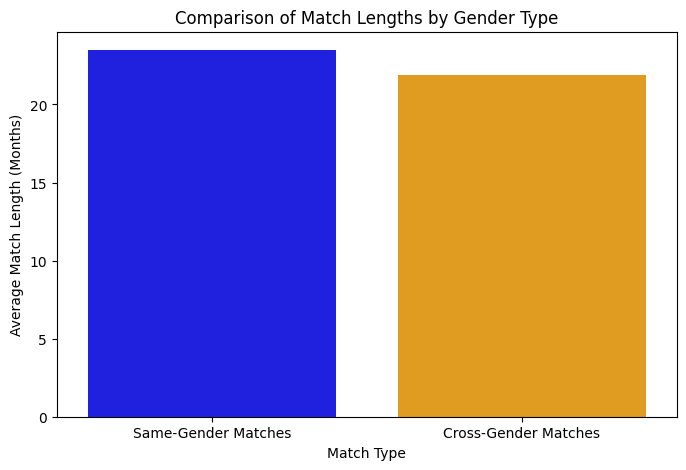

Average Match Length for Same-Gender Matches: 23.48 months
Average Match Length for Cross-Gender Matches: 21.88 months


In [19]:
same_gender_matches = df[df["Big Gender"] == df["Little Gender"]]
cross_gender_matches = df[df["Big Gender"] != df["Little Gender"]]

# Calculate average match length
same_gender_avg = same_gender_matches["Match Length"].mean()
cross_gender_avg = cross_gender_matches["Match Length"].mean()

# Create a DataFrame for visualization
match_length_data = pd.DataFrame({
    "Match Type": ["Same-Gender Matches", "Cross-Gender Matches"],
    "Average Match Length (Months)": [same_gender_avg, cross_gender_avg]
})

# Plot the results
plt.figure(figsize=(8,5))
sns.barplot(x="Match Type", y="Average Match Length (Months)", data=match_length_data, palette=["blue", "orange"])
plt.title("Comparison of Match Lengths by Gender Type")
plt.ylabel("Average Match Length (Months)")
plt.xlabel("Match Type")
plt.show()

# Print the results
print(f"Average Match Length for Same-Gender Matches: {same_gender_avg:.2f} months")
print(f"Average Match Length for Cross-Gender Matches: {cross_gender_avg:.2f} months")

C:\Users\kojo1\AppData\Local\Temp\ipykernel_22968\4136965765.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Gender Alignment", y="Match Length", data=df, ax=axes[0], palette="Set2", inner="quartile")
C:\Users\kojo1\AppData\Local\Temp\ipykernel_22968\4136965765.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(["Different Gender", "Same Gender"])
C:\Users\kojo1\AppData\Local\Temp\ipykernel_22968\4136965765.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Interest Alignment", y="Match Length", data=df, ax=axes[1], palette="Blues", inner="quartile")
C:\Users\kojo1

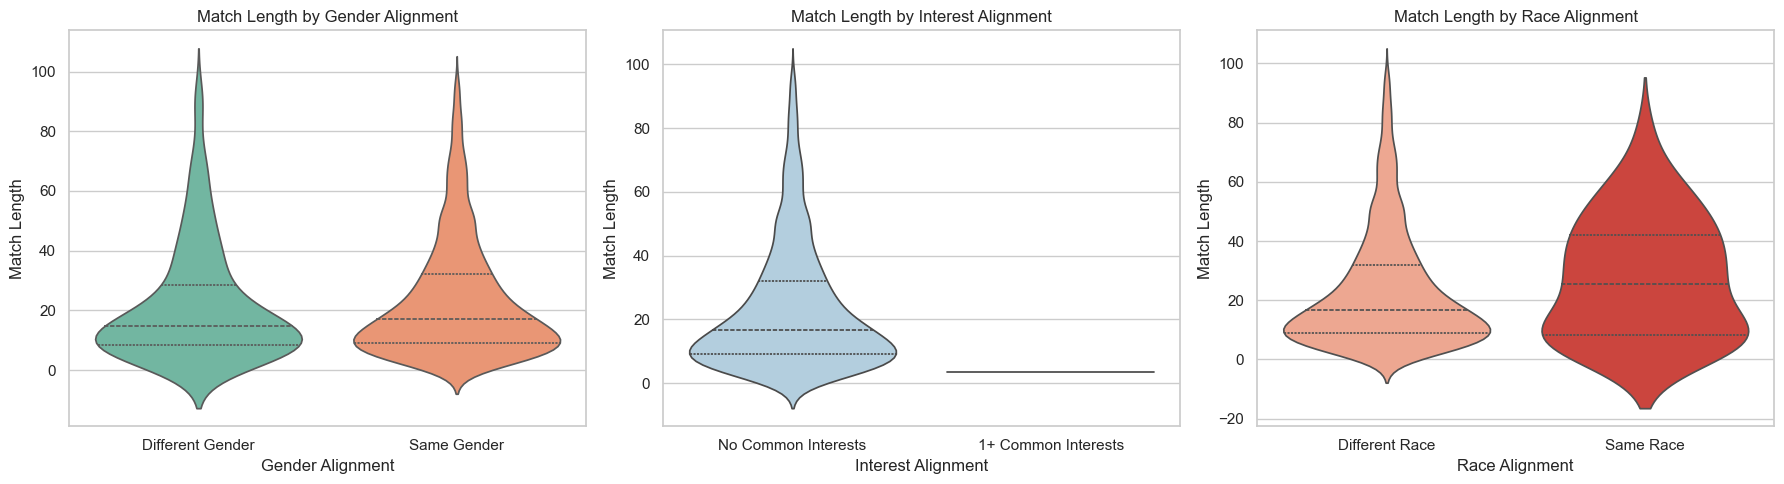

In [27]:
# Create a figure with multiple subplots using violin plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Violin plot: Gender Alignment vs Match Length
sns.violinplot(x="Gender Alignment", y="Match Length", data=df, ax=axes[0], palette="Set2", inner="quartile")
axes[0].set_title("Match Length by Gender Alignment")
axes[0].set_xticklabels(["Different Gender", "Same Gender"])

# Violin plot: Interest Alignment vs Match Length
sns.violinplot(x="Interest Alignment", y="Match Length", data=df, ax=axes[1], palette="Blues", inner="quartile")
axes[1].set_title("Match Length by Interest Alignment")
axes[1].set_xticklabels(["No Common Interests", "1+ Common Interests"])

# Violin plot: Race Alignment vs Match Length
sns.violinplot(x="Race Alignment", y="Match Length", data=df, ax=axes[2], palette="Reds", inner="quartile")
axes[2].set_title("Match Length by Race Alignment")
axes[2].set_xticklabels(["Different Race", "Same Race"])

# Show plots
plt.tight_layout()
plt.show()


In [ ]:
# Define successful match criteria
def is_successful(row):
    #Match remains active (no closure reason)
    if pd.isna(row['Closure Reason']) or row['Closure Reason'] == '':
        return True
    
    #Match closes due to the age of Little
    if not pd.isna(row['Closure Reason']) and 'Age' in str(row['Closure Reason']):
        return True
    
    #"Successful Match Closure" as the Closure Reason
    if not pd.isna(row['Closure Reason']) and 'Successful' in str(row['Closure Reason']):
        return True
    
    return False

In [ ]:
#Calculate match length statistics
median_match_length = df['Match Length'].median()
print(f"Median match length: {median_match_length}")

#Add success flag based on all criteria
df['is_successful'] = df.apply(lambda row: is_successful(row) or 
                              (not pd.isna(row['Match Length']) and 
                               row['Match Length'] >= median_match_length), axis=1)

#Count successful and unsuccessful matches
successful_matches = df['is_successful'].sum()
unsuccessful_matches = len(df) - successful_matches
success_rate = successful_matches / len(df) * 100

print(f"Successful matches: {successful_matches}")
print(f"Unsuccessful matches: {unsuccessful_matches}")
print(f"Success rate: {success_rate:.2f}%")

#Big's age
df['Big Age Group'] = df['Big Age'].apply(lambda x: f"{int(x // 10 * 10)}s" if not pd.isna(x) else None)
big_age_success = df.groupby('Big Age Group')['is_successful'].agg(['count', 'sum'])
big_age_success['success_rate'] = big_age_success['sum'] / big_age_success['count'] * 100

print("\nSuccess rate by Big's age group:")
print(big_age_success.sort_values('success_rate', ascending=False))

#Gender match
df['same_gender'] = df['Big Gender'] == df['Little Gender']
gender_match_success = df.groupby('same_gender')['is_successful'].agg(['count', 'sum'])
gender_match_success['success_rate'] = gender_match_success['sum'] / gender_match_success['count'] * 100

print("\nSuccess rate by gender match:")
print(gender_match_success)

In [ ]:
#Interest match
def count_common_interests(row):
    interest_categories = ["Sports", "Places To Go", "Hobbies", "Entertainment"]
    common_count = 0
    
    for category in interest_categories:
        big_interests = row.get(f"Big Contact: Interest Finder - {category}")
        little_interests = row.get(f"Little Contact: Interest Finder - {category}")
        
        if pd.notna(big_interests) and pd.notna(little_interests):
            # Simple check - do both strings contain some common words?
            big_words = str(big_interests).lower().split()
            little_words = str(little_interests).lower().split()
            
            # Find intersection of words longer than 3 characters
            common_words = [word for word in big_words if len(word) > 3 and word in little_words]
            
            if len(common_words) > 0:
                common_count += 1
    
    return common_count


In [ ]:
df['common_interests'] = df.apply(count_common_interests, axis=1)
df['interest_group'] = df['common_interests'].apply(lambda x: "0" if x == 0 else "1" if x == 1 else "2+")
interest_success = df.groupby('interest_group')['is_successful'].agg(['count', 'sum'])
interest_success['success_rate'] = interest_success['sum'] / interest_success['count'] * 100

print("\nSuccess rate by common interest categories:")
print(interest_success)

#Geography - Check if geographical proximity matters
df['same_census_block'] = df['Little Mailing Address Census Block Group'] == df['Big Home Census Block Group']
proximity_success = df.groupby('same_census_block')['is_successful'].agg(['count', 'sum'])
proximity_success['success_rate'] = proximity_success['sum'] / proximity_success['count'] * 100

print("\nSuccess rate by geographical proximity:")
print(proximity_success)



In [ ]:
#Time from application to match
def time_group(days):
    if pd.isna(days):
        return None
    if days < 30:
        return "Fast (< 30 days)"
    elif days <= 90:
        return "Medium (30-90 days)"
    else:
        return "Slow (> 90 days)"



In [ ]:
df['time_group'] = df['Big Days Interview to Match'].apply(time_group)
time_success = df.groupby('time_group')['is_successful'].agg(['count', 'sum'])
time_success['success_rate'] = time_success['sum'] / time_success['count'] * 100

print("\nSuccess rate by time from interview to match:")
print(time_success)

#Program Type
program_success = df.groupby('Program Type')['is_successful'].agg(['count', 'sum'])
program_success['success_rate'] = program_success['sum'] / program_success['count'] * 100

print("\nSuccess rate by program type:")
print(program_success)

#Check top closure reasons for unsuccessful matches
unsuccessful_df = df[~df['is_successful']]
closure_reasons = unsuccessful_df['Closure Reason'].value_counts()
closure_percentage = closure_reasons / len(unsuccessful_df) * 100

print("\nTop reasons for unsuccessful matches:")
print(closure_reasons.head(5))
print(closure_percentage.head(5))


try:
    
    # Set up the figure size
    plt.figure(figsize=(10, 6))
    
    # Create a bar plot for age groups
    sns.barplot(x=big_age_success.index, y=big_age_success['success_rate'], palette='viridis')
    plt.title('Match Success Rate by Big\'s Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Success Rate (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('age_group_success.png')
    plt.close()
    
    # Create a bar plot for program types
    plt.figure(figsize=(10, 6))
    sns.barplot(x=program_success.index, y=program_success['success_rate'], palette='viridis')
    plt.title('Match Success Rate by Program Type')
    plt.xlabel('Program Type')
    plt.ylabel('Success Rate (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('program_type_success.png')
    plt.close()
    
    # Create a pie chart for closure reasons
    plt.figure(figsize=(10, 8))
    plt.pie(closure_reasons.head(5), labels=closure_reasons.head(5).index, autopct='%1.1f%%')
    plt.title('Top 5 Reasons for Unsuccessful Matches')
    plt.tight_layout()
    plt.savefig('closure_reasons.png')
    plt.close()
    
    print("\nVisualization files created: age_group_success.png, program_type_success.png, closure_reasons.png")
except ImportError:
    print("\nMatplotlib and/or seaborn not available. Skipping visualizations.")